In [1]:
#Desarrollado con Jupyter Notebook de Anaconda (Python)
#Autor: Mijael Salazar
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Se importan los datos del archivo "suicidios.csv", para luego asignarlos a la variable data
data = pd.read_csv('suicidios.csv')

In [4]:
#Se muestran las primeras 3 filas de 372 de la variable o tabla data
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
1,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
2,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation


In [5]:
#Se muestra el tipo de dato que es cada variable de data
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [14]:
#Es para describir estadísticamente cada variable que tiene como dato entero
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,372.000000,3.720000e+02,372.000000,120.000000,372.000000
mean,2000.000000,2169.091398,9.895228e+06,21.573199,0.861300,36397.548387
std,8.956318,2170.876295,4.738393e+06,17.576106,0.033974,8654.622419
min,1985.000000,12.000000,1.791000e+06,0.190000,0.791000,12401.000000
25%,1992.000000,641.500000,6.317392e+06,8.855000,0.838000,33320.000000
50%,2000.000000,1641.000000,8.469400e+06,16.820000,0.879000,37534.000000
75%,2008.000000,2585.250000,1.472475e+07,33.787500,0.888000,41563.000000
max,2015.000000,8948.000000,1.836200e+07,78.770000,0.891000,51379.000000


In [6]:
#
data1 = data.iloc[:, 3:5].values

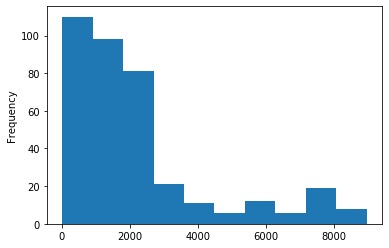

In [26]:
#Histograma de la variable número de suicidios 'suicides_no' en relación a la frecuencia 0-100
data ['suicides_no'].plot.hist()
plt.show()

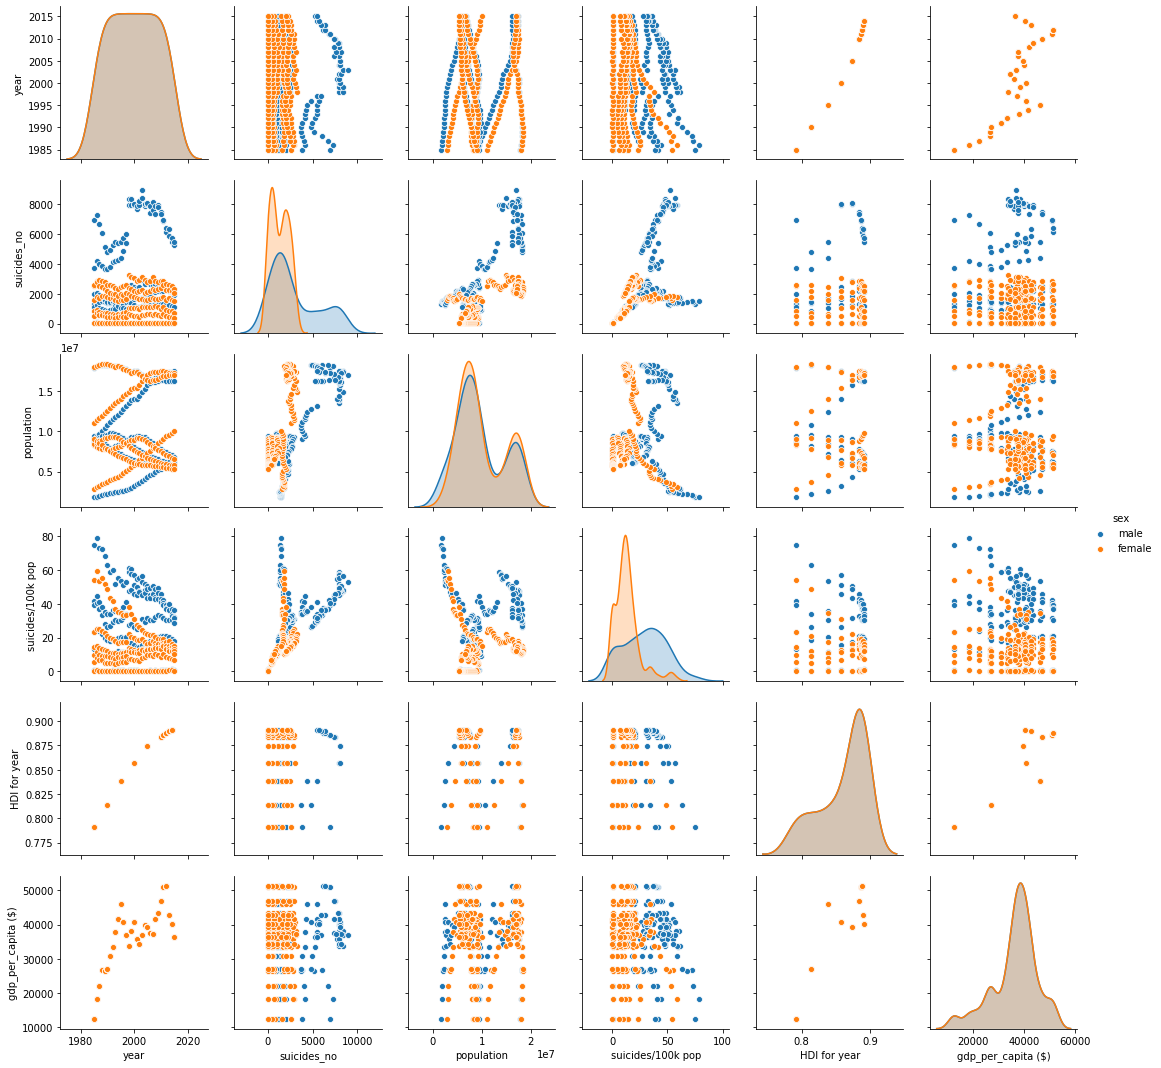

In [41]:
#Muestra gráficos para saber como se relacionan entre cada par de datos con la variable Sexo 'sex'
sns.pairplot (data, hue ='sex')

Observamos que con esta función ya se diferencia los sexos femenino y masculino, graficando su
comportamiento frente a las otras variables restantes.
En los gráficos se nota la diferencia y dispersión que tienen entre los géneros masculino(azul) y
femenino(naranja).

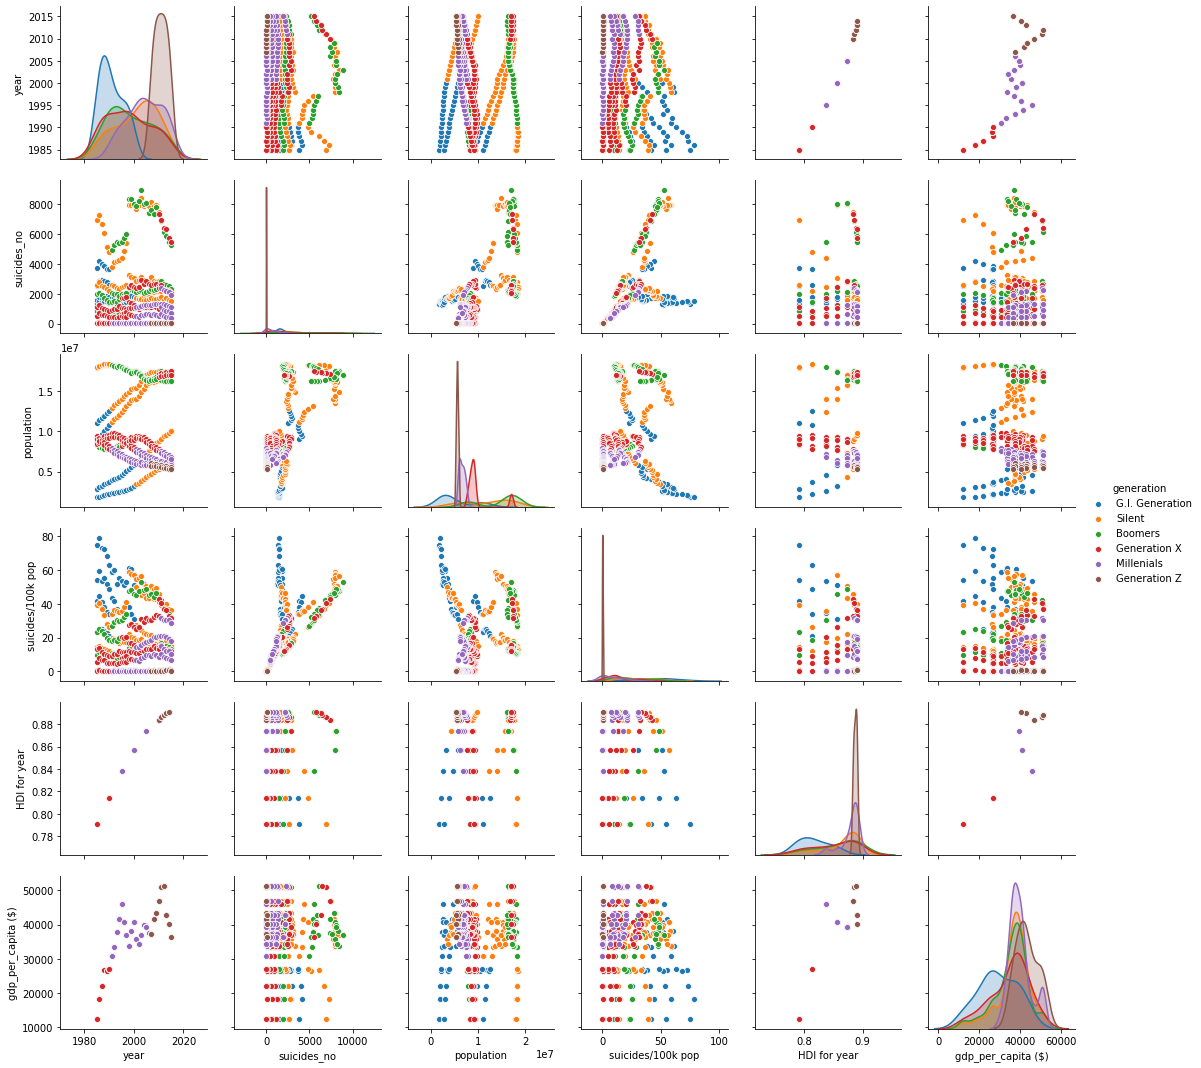

In [25]:
#Muestra gráficos para saber como se relacionan entre cada par de datos con la variable Generación 'generation'
sns.pairplot (data, hue ='generation')

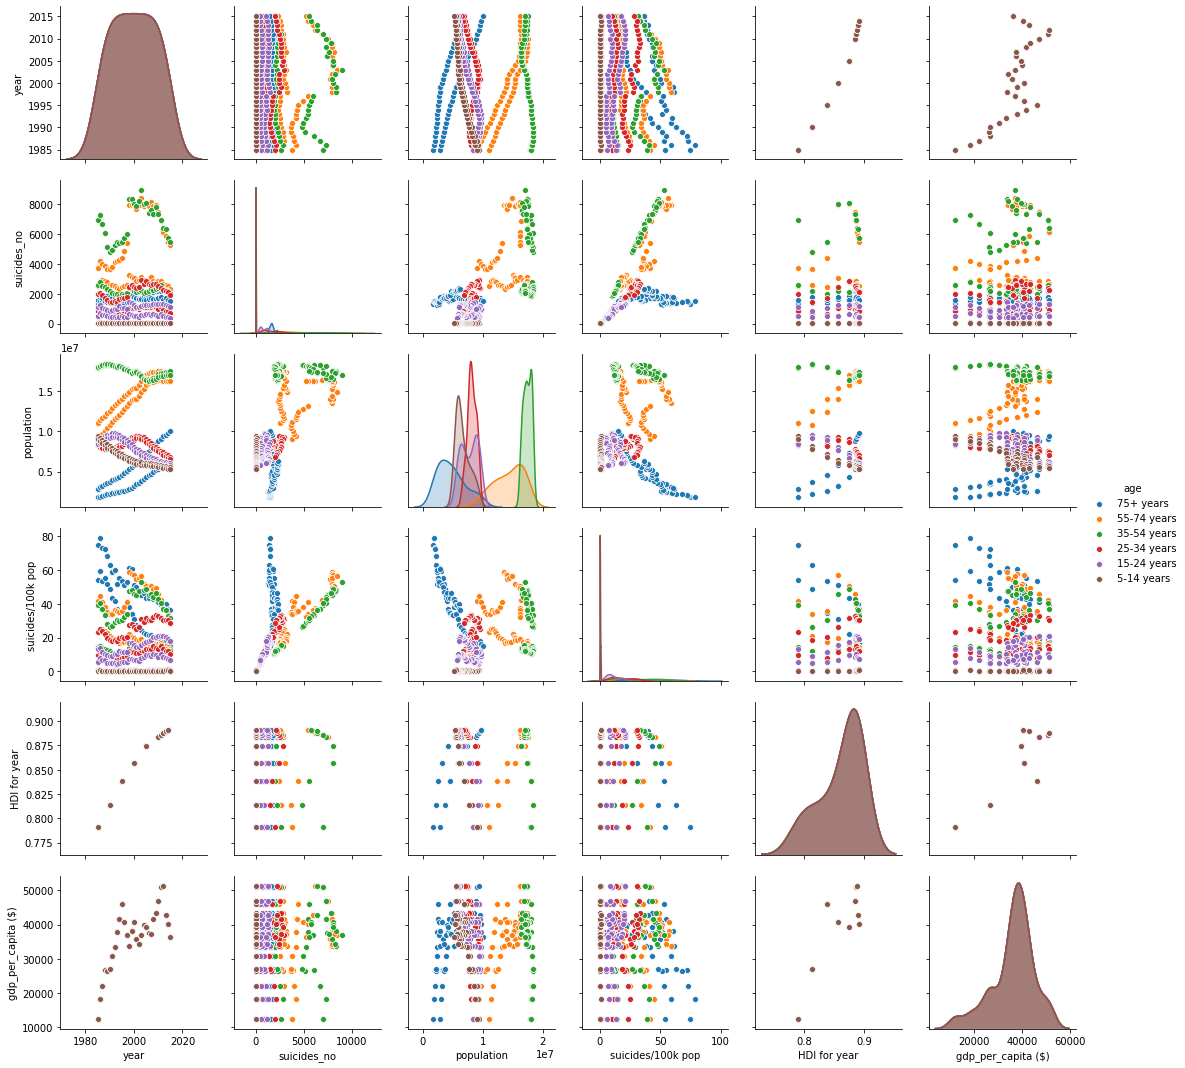

In [26]:
#Muestra gráficos para saber como se relacionan entre cada par de datos con la variable Edad en años'age'
sns.pairplot (data, hue ='age')

Aquí también ya se diferencia las edades con su respectivo color y el comportamiento o relación que tiene frente a las otras variables.
Se observa que las edades 55-74 years (naranja) y 35-54 years (verde) siempre se mantienen casi juntos, esto significa que las características que tienen ambos no tienen mucha diferencia o son similares.

In [16]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
1,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
2,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation


Los siguientes gráficos muestran estadísticamente el número de suicidios en cada generación, edad y sexo respectivamente estando los suicidios en el eje X y la generación, edad y sexo en el eje Y.

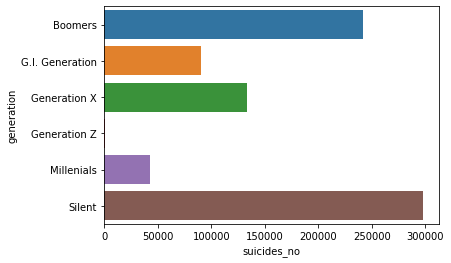

In [31]:
#Método para mostrar estadística por barras 
#Se muestra horizontalmente por barras el número de suicidios por cada generación
#A la variable test se le asigna los valores y variables de data
#test.columns = ['generation', 'suicides_no']
test=data.groupby(["generation"])["suicides_no"].sum().reset_index().rename(columns={'generation':'generation', '':'suicide_no'})
test.head()

sns.barplot(x="suicides_no", y="generation", data=test)
plt.show()

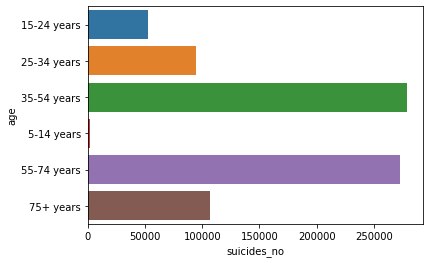

In [15]:
#Método para mostrar estadística por barras 
#Se muestra horizontalmente por barras el número de suicidios por edad
#A la variable test1 se le asigna los valores y variables de data
#test.columns = ['age', 'suicides_no']
test1=data.groupby(["age"])["suicides_no"].sum().reset_index().rename(columns={'age':'age', '':'suicide_no'})
test1.head()

sns.barplot(x="suicides_no", y="age", data=test1)
plt.show()

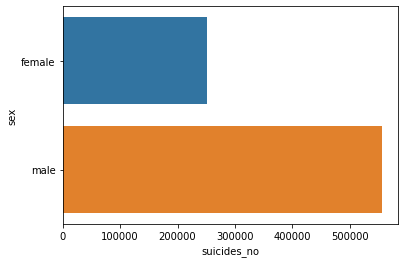

In [23]:
#Método para mostrar estadística por barras 
#Se muestra horizontalmente por barras el número de suicidios por sexo
#A la variable test2 se le asigna los valores y variables de data
#test.columns = ['age', 'suicides_no']

test2=data.groupby(["sex"])["suicides_no"].sum().reset_index().rename(columns={'sex':'sex', '':'suicide_no'})
test2.head()

sns.barplot(x="suicides_no", y="sex", data=test2)
plt.show()

Entonces según los gráficos anteriores podemos deducir que, las personas que más se suicidan son de sexo masculino de entre 35 a 54 años de edad que nacieron y vivieron en la generación silenciosa.
Y por otro lado los de menor número de suicidios registrados son de mujeres, y también las personas de entre 5 a 14 años que nacieron en la generación Z.

In [33]:
#Se le asigna a la variable X los datos localizados en las columnas 4 y 5, 'suicides_no' y 'population'
X = data.iloc[:,4:6]

In [34]:
#Se muestra las primeras 3 filas de X
X.head(3)

,suicides_no,population
0,1340,1791000
1,1553,2862400
2,3763,8996900


In [35]:
#Se le asigna a la variable y los datos de la variable o columna 10 'generation', para separar
y = data.iloc[:,11]

In [36]:
#Se muestra las primeras 3 filas de Y
y.head(3)

0    G.I. Generation
1    G.I. Generation
2    G.I. Generation
Name: generation, dtype: object

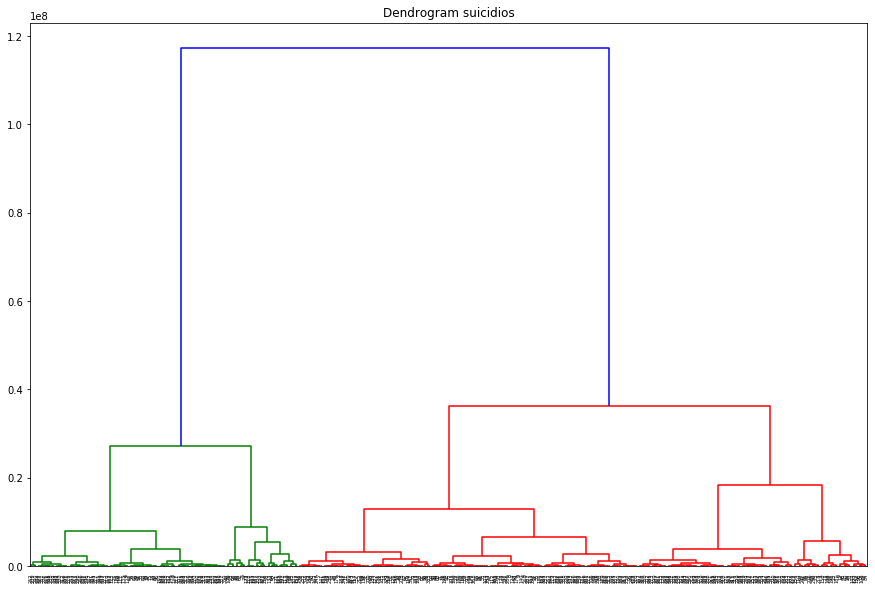

In [37]:
#Se muestra un dendograma donde clusteriza los datos de X 'suicides_no' y 'population'
#Usando el método WARD
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram suicidios")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

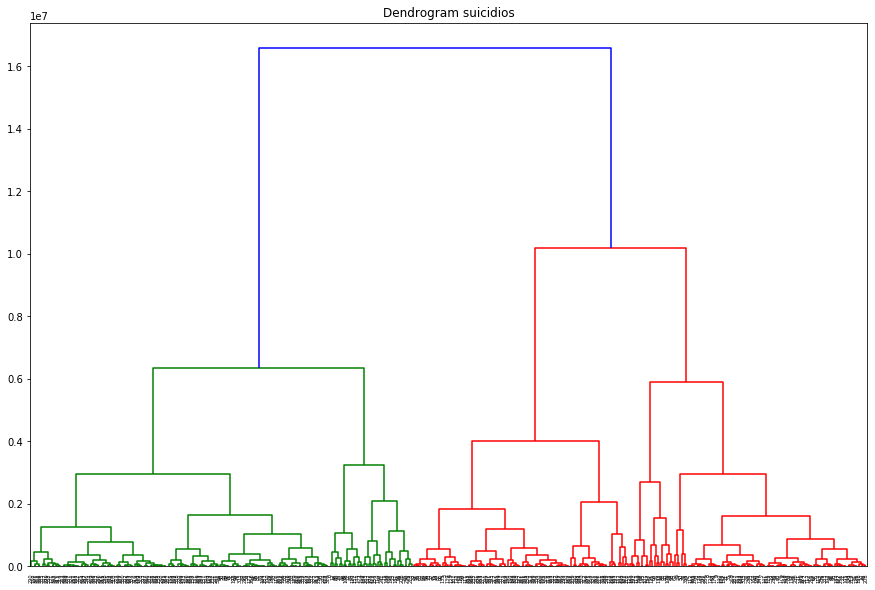

In [38]:
#Se muestra un dendograma donde clusteriza los datos de X 'suicides_no' y 'population'
#Usando el método COMPLETE
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram suicidios")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))

El dendograma nos muestra 2 grupos por colores distintos clasificados como conjuntos datos diferentes en características o valores.
Se puede afirmar que con los datos “número de suicidios” y “población” hay 2 grupos o clústers, diferenciados ya sea por los valores de las variables o características.

CONCLUSIÓN

Con scipy.cluster.hierarchy (HAC) la agrupación de datos y deducir en número de clústers es fácil ya que primero analiza un clúster, luego este se va uniendo con otros según distancia o características similares , así hasta que la diferencia sea alta.

Respecto a los suicidios en Japón, se da a concluir que:

- Las personas de entre 35 a 54 años se suicidaron más, llegando hasta el pico de más de 250000 suicidios en un año.
- Las personas que nacieron y vivieron en la generación silenciosa o después de la segunda guerra mundial se quitaron la vida con más frecuencia.
- Más Hombres (32%) se quitaron la vida que Mujeres (68%). 

Datos registrados en los años 1985 a 2015.